In [508]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from PIL import Image
import requests
from io import BytesIO
from patsy import dmatrices

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import graphviz 

In [117]:
df_raw = pd.read_csv("./data/Credit.csv")

In [118]:
df_raw.shape

(400, 12)

In [119]:
df_raw.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [120]:
df = df_raw.astype({ 'Gender': 'category', 'Student': 'category', 'Married': 'category', 'Ethnicity': 'category' }).drop('Unnamed: 0', axis=1)

In [121]:
df.dtypes

Income        float64
Limit           int64
Rating          int64
Cards           int64
Age             int64
Education       int64
Gender       category
Student      category
Married      category
Ethnicity    category
Balance         int64
dtype: object

In [122]:
df.shape

(400, 11)

array([[<AxesSubplot:xlabel='Income', ylabel='Income'>,
        <AxesSubplot:xlabel='Limit', ylabel='Income'>,
        <AxesSubplot:xlabel='Rating', ylabel='Income'>,
        <AxesSubplot:xlabel='Cards', ylabel='Income'>,
        <AxesSubplot:xlabel='Age', ylabel='Income'>,
        <AxesSubplot:xlabel='Education', ylabel='Income'>,
        <AxesSubplot:xlabel='Balance', ylabel='Income'>,
        <AxesSubplot:xlabel='IncomeGt50', ylabel='Income'>],
       [<AxesSubplot:xlabel='Income', ylabel='Limit'>,
        <AxesSubplot:xlabel='Limit', ylabel='Limit'>,
        <AxesSubplot:xlabel='Rating', ylabel='Limit'>,
        <AxesSubplot:xlabel='Cards', ylabel='Limit'>,
        <AxesSubplot:xlabel='Age', ylabel='Limit'>,
        <AxesSubplot:xlabel='Education', ylabel='Limit'>,
        <AxesSubplot:xlabel='Balance', ylabel='Limit'>,
        <AxesSubplot:xlabel='IncomeGt50', ylabel='Limit'>],
       [<AxesSubplot:xlabel='Income', ylabel='Rating'>,
        <AxesSubplot:xlabel='Limit', ylabel='Rat

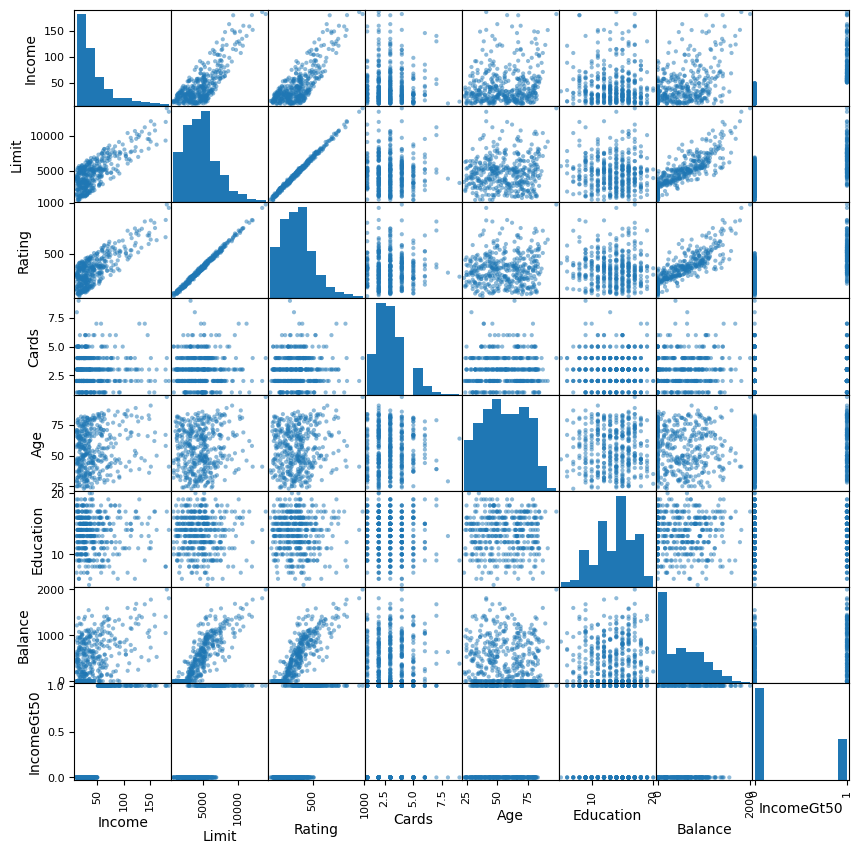

In [283]:
pd.plotting.scatter_matrix(df, figsize=(10, 10))

In [512]:
def train_model(df, formula, model):
    y, x = dmatrices(formula, data=df, return_type='dataframe') 
    Y = y.values.ravel()
    min_max_scaler = preprocessing.MinMaxScaler()
    X = preprocessing.StandardScaler().fit(x.values).transform(x.values)
    
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=1)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    msg = "mean: %f       std: %f" % (cv_results.mean(), cv_results.std())
    print(msg)

## Logistic regression

In [513]:
df['IncomeGt50'] = df.apply(lambda row: 1 if row['Income'] > 50 else 0, axis=1)

In [514]:
df.dtypes

Income         float64
Limit            int64
Rating           int64
Cards            int64
Age              int64
Education        int64
Gender        category
Student       category
Married       category
Ethnicity     category
Balance          int64
IncomeGt50       int64
dtype: object

## Logistic regression

In [515]:
train_model(df, "IncomeGt50 ~ Limit + Rating + Education + Student + Balance", LogisticRegression())

mean: 0.945000       std: 0.028062


In [516]:
train_model(df, "Cards ~ Limit + Rating + Education + Gender + Married + Balance", LogisticRegression())

mean: 0.332500       std: 0.040774


## KNN

In [517]:
train_model(df, "IncomeGt50 ~ Limit + Rating + Education + Student + Balance", KNeighborsClassifier(n_neighbors=3))

mean: 0.920000       std: 0.029155


In [523]:
train_model(df, "Cards ~ Limit + Rating + Education + Gender + Married + Balance", KNeighborsClassifier(n_neighbors=170))

mean: 0.275000       std: 0.041833


## Decision trees

In [524]:
train_model(df, "IncomeGt50 ~ Rating + Balance", DecisionTreeClassifier(max_depth=20))

mean: 0.912500       std: 0.032596


In [525]:
train_model(df, "Cards ~ Limit + Rating + Education + Married + Balance", DecisionTreeClassifier(max_depth=5))

mean: 0.280000       std: 0.035000


In [ ]:
def draw_decision_boundary()